In [1]:
# Install packages (only needed in Google Colab)
# If using Jupyter locally, run once in terminal: pip install pandas matplotlib seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Show charts inside notebook
%matplotlib inline


In [2]:
# Sample Mobile Sales Data in Tamil Nadu (2025)
data = {
    "Brand": ["Apple", "Samsung", "Vivo", "Oppo", "Realme", "iQOO"],
    "Units_Sold": [3000, 2500, 2700, 1800, 2000, 1500],
    "Price_Avg": [80000, 25000, 22000, 20000, 18000, 28000]
}

df = pd.DataFrame(data)

# Show table
df


,Brand,Units_Sold,Price_Avg
0,Apple,3000,80000
1,Samsung,2500,25000
2,Vivo,2700,22000
3,Oppo,1800,20000
4,Realme,2000,18000
5,iQOO,1500,28000


In [3]:
df.to_csv("tn_mobile_sales_2025.csv", index=False)


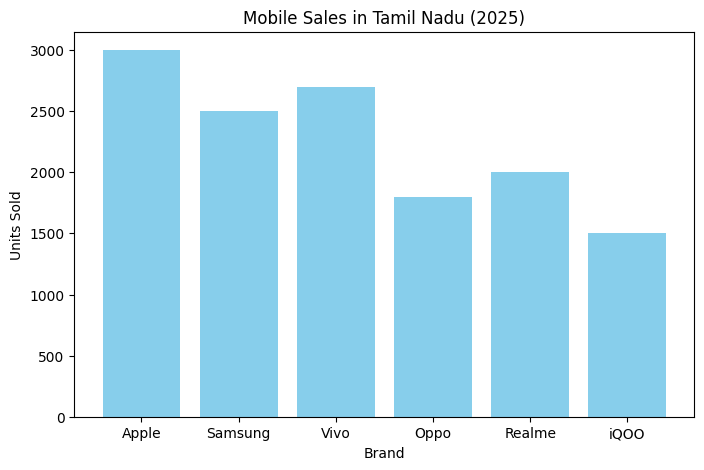

In [4]:
plt.figure(figsize=(8,5))
plt.bar(df["Brand"], df["Units_Sold"], color="skyblue")
plt.title("Mobile Sales in Tamil Nadu (2025)")
plt.xlabel("Brand")
plt.ylabel("Units Sold")
plt.show()


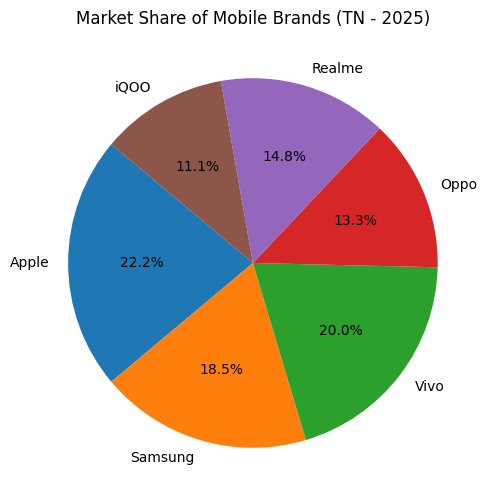

In [5]:
plt.figure(figsize=(6,6))
plt.pie(df["Units_Sold"], labels=df["Brand"], autopct="%1.1f%%", startangle=140)
plt.title("Market Share of Mobile Brands (TN - 2025)")
plt.show()


/tmp/ipython-input-1143007033.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Brand", y="Units_Sold", data=df, palette="viridis")


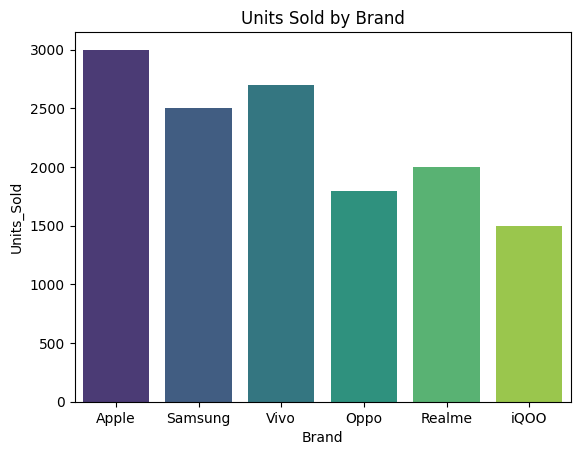

In [6]:
sns.barplot(x="Brand", y="Units_Sold", data=df, palette="viridis")
plt.title("Units Sold by Brand")
plt.show()


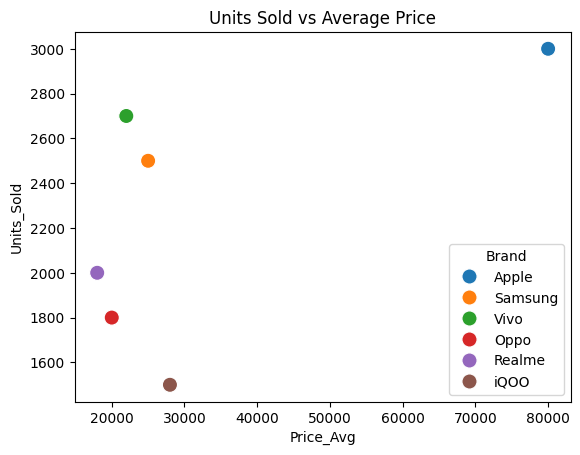

In [7]:
sns.scatterplot(x="Price_Avg", y="Units_Sold", data=df, hue="Brand", s=120)
plt.title("Units Sold vs Average Price")
plt.show()


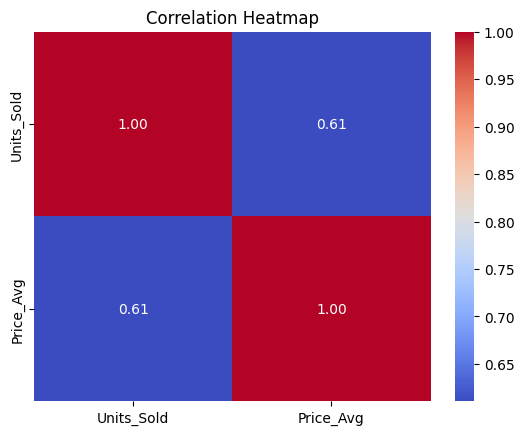

In [8]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


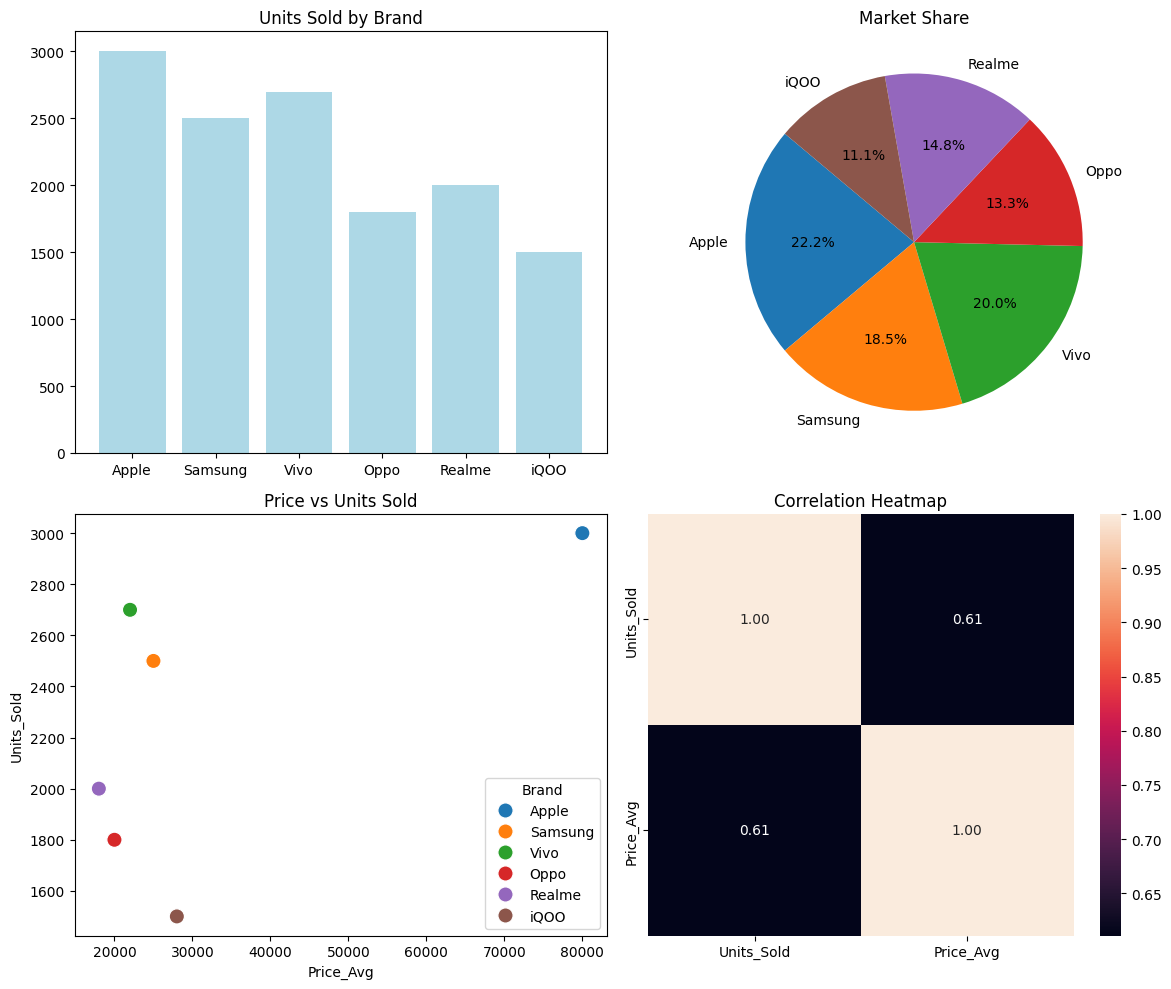

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(12,10))

# 1) Bar
axes[0,0].bar(df["Brand"], df["Units_Sold"], color="lightblue")
axes[0,0].set_title("Units Sold by Brand")

# 2) Pie
axes[0,1].pie(df["Units_Sold"], labels=df["Brand"], autopct="%1.1f%%", startangle=140)
axes[0,1].set_title("Market Share")

# 3) Scatter
sns.scatterplot(x="Price_Avg", y="Units_Sold", data=df, hue="Brand", s=120, ax=axes[1,0])
axes[1,0].set_title("Price vs Units Sold")

# 4) Heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", ax=axes[1,1])
axes[1,1].set_title("Correlation Heatmap")

plt.tight_layout()
plt.show()


In [10]:
# Market share calculation
df["Market_Share_%"] = (df["Units_Sold"] / df["Units_Sold"].sum() * 100).round(1)

print("Market Share by Brand:\n", df[["Brand","Market_Share_%"]])

# Correlation between price & units
corr = df[["Price_Avg","Units_Sold"]].corr().iloc[0,1]
print("\nCorrelation (Price vs Units Sold):", round(corr, 3))


Market Share by Brand:
      Brand  Market_Share_%
0    Apple            22.2
1  Samsung            18.5
2     Vivo            20.0
3     Oppo            13.3
4   Realme            14.8
5     iQOO            11.1

Correlation (Price vs Units Sold): 0.611
